In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
train = pd.read_csv('200811-201811.csv')
train.head()
#Danger分類點說明
#對敏感族群不健康為PM2.5數值在35.5以上

SO2    CO    O3  PM25  Nox    NO    NO2    THC   NMHC    CH4  WindSpeed  \
0  4.4  0.47  32.2    31   24  3.46  20.84  2.309  0.231  2.078       1.91   
1  6.4  0.52  30.2    32   32  5.64  26.30  2.186  0.227  1.959       1.72   
2  3.2  0.45  30.5    46   20  2.36  18.05  0.000  0.000  0.000       2.08   
3  5.2  0.47  32.5    38   24  3.18  20.64  2.374  0.225  2.150       1.66   
4  4.5  0.72  29.9    32   29  5.43  23.82  2.290  0.287  2.004       1.03   

    TEMP  Humidity  Danger  
0  24.86     77.11       0  
1  26.58     71.93       0  
2  24.75     76.33       1  
3  24.97     79.97       1  
4  26.18     73.78       0

**用heatmap(.isnull())來找出缺失的資料在哪些欄位**

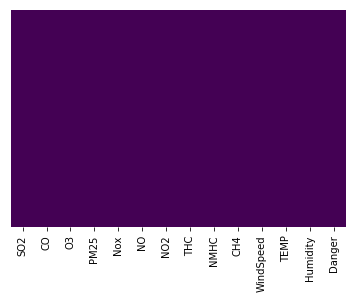

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**用countplot來看Nox是否影響健康**

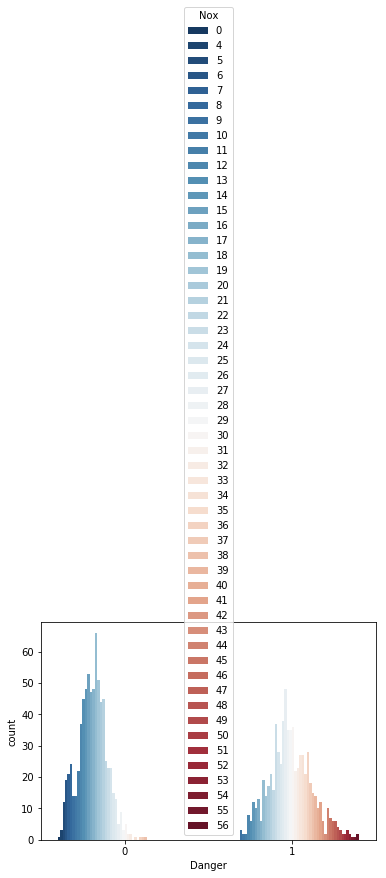

In [13]:
sns.countplot(x='Danger',hue='Nox',data=train,palette='RdBu_r')

**用直方圖看年齡分佈。缺失資料在此不計。**

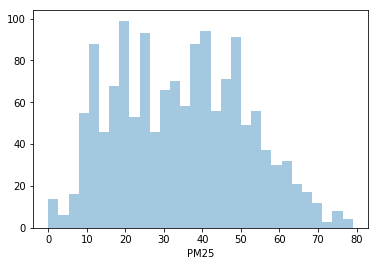

In [15]:
sns.distplot(train['PM25'].dropna(),kde=False,bins=30)

**用直方圖看Nox的分佈**

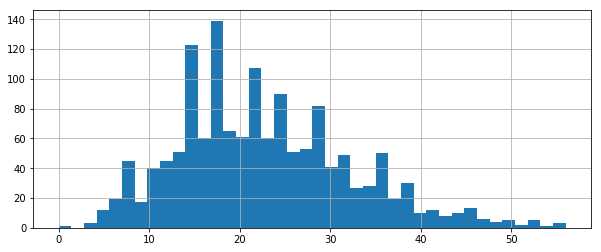

In [16]:
train['Nox'].hist(bins=40,figsize=(10,4))

In [18]:
X = train.drop('Danger', axis=1)
y = train['Danger']

In [19]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.75,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       560
           1       0.98      0.96      0.97       526

   micro avg       0.97      0.97      0.97      1086
   macro avg       0.97      0.97      0.97      1086
weighted avg       0.97      0.97      0.97      1086



In [40]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[549,  11],
       [ 20, 506]], dtype=int64)